### Black scholes 

$$
\begin{array}{c}
c=N\left(d_{1}\right) S_{t}-N\left(d_{2}\right) K e^{-r t} \\\end{array}
$$
where
$$\begin{array}{c}d_{1}=\frac{\ln \frac{S_{1}}{K}+\left(r+\frac{\sigma^{2}}{2}\right) t}{\sigma \sqrt{t}} \\
\text {  } d_{2}=d_{1}-\sigma \sqrt{t}
\end{array}
$$

### Garman kohlhagen
Then the domestic currency value of a call option into the foreign currency is
$$
c=S_{0} e^{-r_{f} T} \mathcal{N}\left(d_{1}\right)-K e^{-r_{d} T} \mathcal{N}\left(d_{2}\right)
$$

$$
p=K e^{-r_{d} T} \mathcal{N}\left(-d_{2}\right)-S_{0} e^{-r_{f} T} \mathcal{N}\left(-d_{1}\right)
$$
where :
$$
\begin{array}{l}
d_{1}=\frac{\ln \left(S_{0} / K\right)+\left(r_{d}-r_{f}+\sigma^{2} / 2\right) T}{\sigma \sqrt{T}} \\
d_{2}=d_{1}-\sigma \sqrt{T}
\end{array}
$$
- $S_{0}$ is the current spot rate
- $K$ is the strike price $\mathcal{N}(x)$ is the cumulative normal distribution function
- $r_{d}$ is domestic risk free simple interest rate
- $r_{f}$ is foreign risk free simple interest rate
- $T$ is the time to maturity (calculated according to the appropriate day count convention)
- $\sigma$ is the volatility of the FX rate.



### Estimate the historical volatility of the option empirically.
$$
r_{i}=\ln \left(\frac{S_{i}}{S_{i-1}}\right) \text { for } i=0,1,2,3, \ldots, n
$$
Where $(n+1)$ is the number of observations, $S_{i}$ is the stock price at end of it time interval
The standard deviation of the $r_{i}$ is given by
$$
s t d=\sqrt{\frac{1}{n-1} \sum_{i=1}^{n}\left(r_{i}-\bar{r}\right)^{2}}
$$
where $\bar{r}$ is the mean of $r_{i}$

In [1]:
# !wget https://raw.githubusercontent.com/pambnb/Option/main/data/EURUSD1440.csv
# !wget https://raw.githubusercontent.com/pambnb/Option/main/data/NZDUSD1440.csv
# !wget https://raw.githubusercontent.com/YatipaC/Option/main/data/AUDUSD1440.csv
# !wget https://raw.githubusercontent.com/YatipaC/Option/main/data/GBPUSD1440.csv
# !wget https://raw.githubusercontent.com/pambnb/Option/main/data/rfr.csv

In [2]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame
import math
from datetime import date, timedelta
from numpy import sqrt,mean,log,diff
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("rfr.csv") 

In [4]:
my_country = df["Reference area"].unique().tolist()
my_currency = ['ARS', 'AUD', 'BRL', 'CAD', 'CHF',
       'CLP', 'CNY', 'COP', 'CZK', 'DKK',
       'GBP', 'HKD', 'HRK', 'HUF',
       'IDR', 'ILS', 'INR', 'ISK', 'JPY', 'KRW',
       'MKD', 'MXN', 'RM', 'NOK', 'NZD',
       'PEN', 'PHP', 'PLN', 'RON', 'RSD', 'RUB',
       'SAR', 'SEK', 'THB', 'TRY', 'USD',
       'EUR', 'ZAR']
my_dict = dict(zip(my_country, my_currency))
df["Reference area"] = df["Reference area"].replace(my_dict)
df = df.rename(columns={"Reference area": "Currency abbreviation"})
df = df.drop(['FREQ', "Frequency", "REF_AREA", "Time Period"], axis = 1)
df.head()

,Currency abbreviation,1946-01-01,1946-01-02,1946-01-03,1946-01-04,1946-01-05,1946-01-06,1946-01-07,1946-01-08,1946-01-09,...,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29
0,ARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.0,38.0,38.00,38.00,38.00,NaN,NaN,NaN,NaN,NaN
1,AUD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.10,0.10,0.10,NaN,NaN,NaN,NaN,NaN
2,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.25,0.25,0.25,0.25,0.25,NaN,NaN,NaN
4,CHF,1.5,1.5,1.5,1.5,NaN,NaN,1.5,1.5,1.5,...,NaN,NaN,-0.75,-0.75,-0.75,-0.75,-0.75,NaN,NaN,-0.75


In [5]:
df[df.columns[1:]] = df[df.columns[1:]].mask(df[df.columns[1:]].eq(-1)).ffill(axis=1)
df.loc[:, '2000-01-01':'2021-03-29']
# 14, 20, 25, 28, 31, 33, 34 -> NAN

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07,2000-01-08,2000-01-09,2000-01-10,...,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29
0,8.20,8.20,7.84,7.22,6.78,6.01,5.84,5.84,5.84,5.81,...,38.000,38.000,38.000,38.000,38.000,38.000,38.000,38.000,38.000,38.000
1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100,0.100
2,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,19.00,...,2.750,2.750,2.750,2.750,2.750,2.750,2.750,2.750,2.750,2.750
3,4.75,4.75,4.75,4.75,4.75,4.75,4.75,4.75,4.75,4.75,...,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
4,0.50,0.50,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,...,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750,-0.750
5,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
6,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,5.85,...,3.850,3.850,3.850,3.850,3.850,3.850,3.850,3.850,3.850,3.850
7,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,12.00,...,1.750,1.750,1.750,1.750,1.750,1.750,1.750,1.750,1.750,1.750
8,5.25,5.25,5.25,5.25,5.25,5.25,5.25,5.25,5.25,5.25,...,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250,0.250
9,3.30,3.30,3.30,3.30,3.30,3.30,3.30,3.30,3.30,3.30,...,-0.500,-0.500,-0.500,-0.500,-0.500,-0.500,-0.500,-0.500,-0.500,-0.500


In [6]:
df.loc[:, '2006-01-01':'2021-03-29'].isnull().values.any()

False

In [7]:
def get_risk_free_rate(date, curr):
    return float(df.loc[df["Currency abbreviation"]== curr][date].values)

In [8]:
# Black scholes 
def d1(S,K,T,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2.)*T)/(sigma*np.sqrt(T))

def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

def bs_call(S,K,T,r,sigma):
    return S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
    return K*np.exp(-r*T)-S*np.exp(-r*T)*norm.cdf(-d1(S,K,T,r,sigma))

In [9]:
# Garman kohlhagen
def d1_var(S,K,T,r,rf,sigma):
    return(log(S/K)+(r-rf+sigma**2/2.)*T)/sigma*sqrt(T)

def d2_var(S,K,T,r,rf,sigma):
    return d1_var(S,K,T,r,rf,sigma)-sigma*sqrt(T)

def bs_call_var(S,K,T,r,rf,sigma):
    return S*exp(-rf*T)*norm.cdf(d1_var(S,K,T,r,rf,sigma))-K*exp(-r*T)*norm.cdf(d2_var(S,K,T,r,rf,sigma))
  
def bs_put_var(S,K,T,r,rf,sigma):
    return K*exp(-r*T)*norm.cdf(-d2_var(S,K,T,r,rf,sigma))-S*exp(-rf*T)*norm.cdf(-d1_var(S,K,T,r,rf,sigma))

In [10]:
from datetime import date, timedelta
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

In [11]:
def open_file(qq):
    data_list = []
    name = str(qq) + '.csv'
    with open(name, 'r') as reading:
        file_input = reading.read().split('\n')

    for row in file_input:
        data_list.append(row.split('\t'))
    data = pd.DataFrame(data_list,columns=['date', 'open', 'high', 'low', 'close', 'vol'])
    data['close'] = pd.to_numeric(data['close'],errors = 'coerce')
    return data

In [12]:
def profitability_std(pair):
    pair_mean = mean(pair)
    diff_square = [(pair[i]-pair_mean)**2 for i in range(0,len(pair))]
    std = sqrt(sum(diff_square)*(1.0/(len(pair)-1)))
    return std

### Black scholes 

In [13]:
def option_black(data,alpha,V,option):
    ''' 
    data = file name (str name) ex open_file("EURUSD1440")
    S = current spot rate = V * currency
    K = strike price = S * (1+alpha)
    r = domestic risk free simple interest rate
    rf = foreign risk free simple interest rate
    T = time to maturity (assume 90 days or 3 months)
    sigma =  volatility of the FX rate of previous T days (get from Garman-Kohlhagen model)
    '''
    T = 3*30/365
    start_date = date(2020, 1, 1)
    end_date = date(2021, 3, 1)
    domestic_currency = [data[i:i+3] for i in range(0, len(data), 3)][0]
    foreign_currency = [data[i:i+3] for i in range(0, len(data), 3)][1]
    list_var = []
    my_date_put = []
    profit = []
    for i, single_date in enumerate(daterange(start_date, end_date)):
        a_date = single_date.isoformat()+str(' 00:00')
        if a_date not in open_file(data)['date'].values:
            a_date = (single_date-timedelta(days=2)).isoformat()+str(' 00:00') 
            
        S = V * float(open_file(data).loc[open_file(data)['date']== a_date]['close'].values) 
        if option == "call":
            K = S / (1 + alpha)
        else:
            K = S * (1 + alpha)
        r = get_risk_free_rate(single_date.isoformat(), domestic_currency)/100
        # historical volatility (30 days time window)
        next_30_day =  (single_date+timedelta(days=30)).isoformat()+str(' 00:00')
        mask = (open_file(data)['date'] >= a_date) & (open_file(data)['date'] <= next_30_day)
        close_price = open_file(data).loc[mask]['close']
        diff_close_price = diff(log(close_price))
        diff_close_price_mean = mean(diff_close_price)
        diff_square = [(diff_close_price[i]-diff_close_price_mean)**2 for i in range(0,len(diff_close_price))]
        sigma = float(sqrt(sum(diff_square)*(1.0/(len(diff_close_price)-1)))) * np.sqrt(365)

        if i >=30:
            if option == "call":
                var_black =  bs_call(S,K,T,r,sigma)
                profit_option = max(0, S-K)
            elif option == "put":
                var_black =  bs_put(S,K,T,r,sigma)
                profit_option = max(0, K-S)
            list_var.append(var_black)
            my_date_put.append(single_date)
            profit.append(profit_option)
        d=dict(zip(my_date_put,list_var))
    return list_var, d, profit




In [14]:
alpha = 0.9
V = 100
data_AUDUSD1440 = 'AUDUSD1440'
list_put_AUDUSD1440, dict_put_AUDUSD1440, profit_put_AUDUSD = option_black(data_AUDUSD1440,alpha,V,'put')
list_call_AUDUSD1440, dict_call_AUDUSD1440, profit_call_AUDUSD  = option_black(data_AUDUSD1440,alpha,V,'call')

data_EURUSD1440 = 'EURUSD1440'
list_put_EURUSD1440, dict_put_EURUSD1440, profit_put_EURUSD = option_black(data_EURUSD1440,alpha,V,'put')
list_call_EURUSD1440, dict_call_EURUSD1440, profit_call_EURUSD = option_black(data_EURUSD1440,alpha,V,'call')

data_GBPUSD1440 = 'GBPUSD1440'
list_put_GBPUSD1440, dict_put_GBPUSD1440, profit_put_GBPUSD = option_black(data_GBPUSD1440,alpha,V,'put')
list_call_GBPUSD1440, dict_call_GBPUSD1440, profit_call_GBPUSD = option_black(data_GBPUSD1440,alpha,V,'call')

data_NZDUSD1440 = 'NZDUSD1440'
list_put_NZDUSD1440, dict_put_NZDUSD1440, profit_put_NZDUSD = option_black(data_NZDUSD1440,alpha,V,'put')
list_call_NZDUSD1440, dict_call_NZDUSD1440, profit_call_NZDUSD = option_black(data_NZDUSD1440,alpha,V,'call')


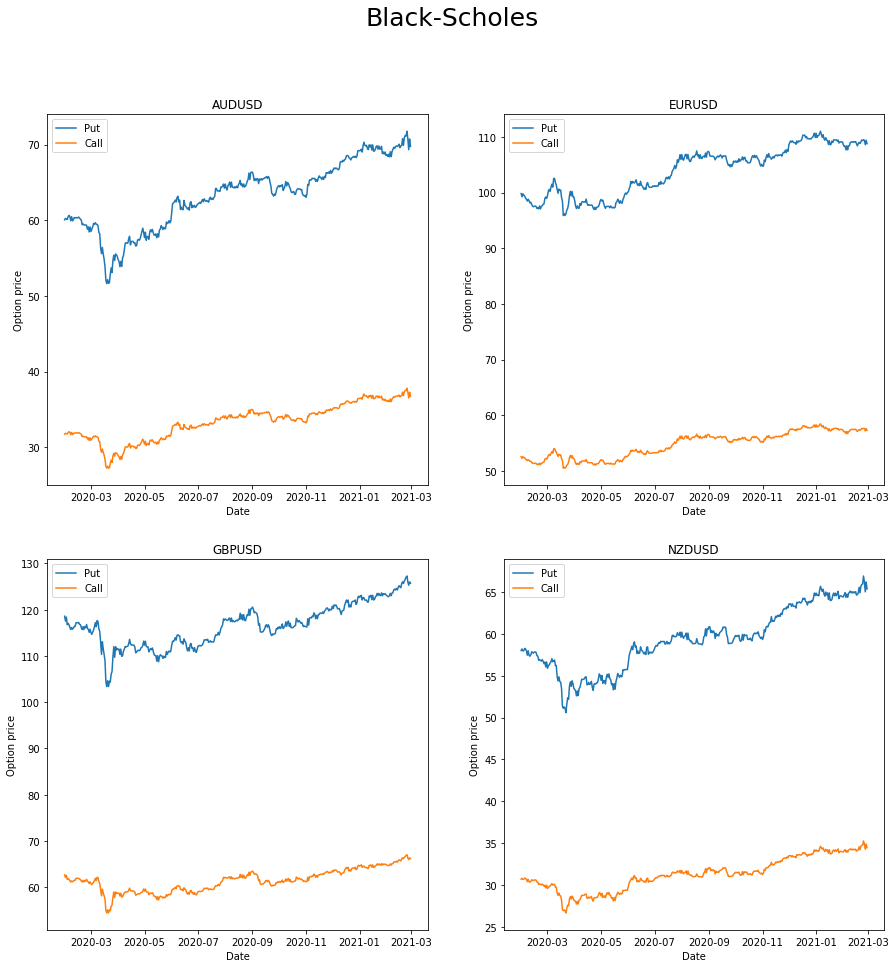

In [15]:
date_option_AUDUSD, price_option_AUDUSD = zip(* dict_put_AUDUSD1440.items())
date_option_EURUSD, price_option_EURUSD = zip(* dict_put_EURUSD1440.items()) 
date_option_GBPUSD, price_option_GBPUSD = zip(* dict_put_GBPUSD1440.items()) 
date_option_NZDUSD, price_option_NZDUSD = zip(* dict_put_NZDUSD1440.items()) 

fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Black-Scholes', fontsize=25)
axs[0, 0].plot(date_option_AUDUSD, list_put_AUDUSD1440, label = 'Put')
axs[0, 0].plot(date_option_AUDUSD, list_call_AUDUSD1440, label = 'Call')
axs[0, 0].set_title('AUDUSD')
axs[0, 1].plot(date_option_EURUSD, list_put_EURUSD1440,  label = 'Put')
axs[0, 1].plot(date_option_EURUSD, list_call_EURUSD1440,  label = 'Call')
axs[0, 1].set_title('EURUSD')
axs[1, 0].plot(date_option_GBPUSD, list_put_GBPUSD1440, label = 'Put')
axs[1, 0].plot(date_option_GBPUSD, list_call_GBPUSD1440, label = 'Call')
axs[1, 0].set_title('GBPUSD')
axs[1, 1].plot(date_option_NZDUSD, list_put_NZDUSD1440,  label = 'Put')
axs[1, 1].plot(date_option_NZDUSD, list_call_NZDUSD1440, label = 'Call')
axs[1, 1].set_title('NZDUSD')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Option price')

for ax in axs.flat:
    ax.legend()

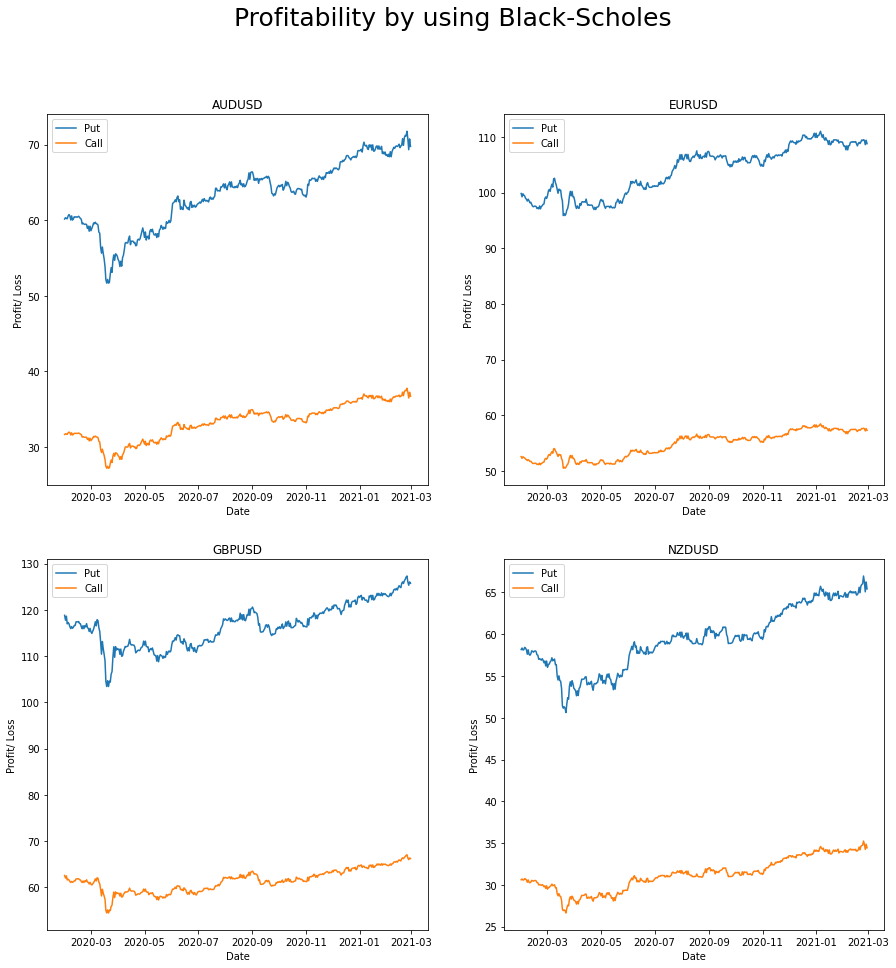

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Profitability by using Black-Scholes', fontsize=25)
axs[0, 0].plot(date_option_AUDUSD, profit_put_AUDUSD, label = 'Put')
axs[0, 0].plot(date_option_AUDUSD, profit_call_AUDUSD, label = 'Call')
axs[0, 0].set_title('AUDUSD')
axs[0, 1].plot(date_option_EURUSD, profit_put_EURUSD,  label = 'Put')
axs[0, 1].plot(date_option_EURUSD, profit_call_EURUSD,  label = 'Call')
axs[0, 1].set_title('EURUSD')
axs[1, 0].plot(date_option_GBPUSD, profit_put_GBPUSD, label = 'Put')
axs[1, 0].plot(date_option_GBPUSD, profit_call_GBPUSD, label = 'Call')
axs[1, 0].set_title('GBPUSD')
axs[1, 1].plot(date_option_NZDUSD, profit_put_NZDUSD,  label = 'Put')
axs[1, 1].plot(date_option_NZDUSD, profit_call_NZDUSD, label = 'Call')
axs[1, 1].set_title('NZDUSD')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Profit/ Loss')
    ax.legend()

In [17]:
exchange_rate_pair_put = [profit_put_AUDUSD, profit_put_EURUSD, profit_put_GBPUSD, profit_put_NZDUSD]
exchange_rate_pair_call = [profit_call_AUDUSD, profit_call_EURUSD, profit_call_GBPUSD, profit_call_NZDUSD]
labels = ["AUDUSD", "EURUSD", "GBPUSD", "NZDUSD"]
for i, label in enumerate(labels):
    res_put = profitability_std(exchange_rate_pair_put[i])
    res_call = profitability_std(exchange_rate_pair_call[i])
    print(f'{labels[i]}: std of call = {res_call} and std of put = {res_put}') 

AUDUSD: std of call = 2.3420362445485208 and std of put = 4.449868864642189
EURUSD: std of call = 2.3075837987471166 and std of put = 4.38440921761952
GBPUSD: std of call = 2.4264171693280416 and std of put = 4.610192621723278
NZDUSD: std of call = 1.9375203522594209 and std of put = 3.6812886692928966


###  Garman kohlhagen

In [18]:
def option_garman(data,alpha,V,option):
    ''' 
    data = file name (str name) ex open_file("EURUSD1440")
    S = current spot rate = V * currency
    K = strike price = S * (1+alpha)
    r = domestic risk free simple interest rate
    rf = foreign risk free simple interest rate
    T = time to maturity (assume 90 days or 3 months)
    sigma =  volatility of the FX rate of previous T days (get from Garman-Kohlhagen model)
    '''
    T = 3*30/365
    start_date = date(2020, 1, 1)
    end_date = date(2021, 3, 1)
    domestic_currency = [data[i:i+3] for i in range(0, len(data), 3)][0]
    foreign_currency = [data[i:i+3] for i in range(0, len(data), 3)][1]
    list_var = []
    my_date_put = []
    profit_garman = []
    for i, single_date in enumerate(daterange(start_date, end_date)):
        a_date = single_date.isoformat()+str(' 00:00')
        if a_date not in open_file(data)['date'].values:
            a_date = (single_date-timedelta(days=2)).isoformat()+str(' 00:00') 
            
        S = V * float(open_file(data).loc[open_file(data)['date']== a_date]['close'].values) 
        if option == "call":
            K = S / (1 + alpha)
        else:
            K = S * (1 + alpha)
        r = get_risk_free_rate(single_date.isoformat(), domestic_currency)/100
        rf = get_risk_free_rate(single_date.isoformat(), foreign_currency)/100
        # historical volatility (30 days time window)
        next_30_day =  (single_date+timedelta(days=30)).isoformat()+str(' 00:00')
        mask = (open_file(data)['date'] >= a_date) & (open_file(data)['date'] <= next_30_day)
        close_price = open_file(data).loc[mask]['close']
        diff_close_price = diff(log(close_price))
        diff_close_price_mean = mean(diff_close_price)
        diff_square = [(diff_close_price[i]-diff_close_price_mean)**2 for i in range(0,len(diff_close_price))]
        sigma = float(sqrt(sum(diff_square)*(1.0/(len(diff_close_price)-1)))) * np.sqrt(365)

        if i >=30:
            if option == "call":
                var_garman =  bs_call_var(S,K,T,r,rf,sigma)
                profit_option = max(0, S-K)
            elif option == "put":
                var_garman =  bs_put_var(S,K,T,r,rf,sigma)
                profit_option = max(0, K-S)
            list_var.append(var_garman)
            my_date_put.append(single_date)
            profit_garman.append(profit_option)
        d=dict(zip(my_date_put,list_var))
    return list_var, d, profit_garman

In [19]:
data_AUDUSD1440 = 'AUDUSD1440' ##
list_put_AUDUSD1440_g, dict_put_AUDUSD1440_g, profit_put_AUDUSD_g = option_garman(data_AUDUSD1440,alpha,V,'put')
list_call_AUDUSD1440_g, dict_call_AUDUSD1440_g, profit_call_AUDUSD_g = option_garman(data_AUDUSD1440,alpha,V,'call')

data_EURUSD1440 = 'EURUSD1440'
list_put_EURUSD1440_g, dict_put_EURUSD1440_g, profit_put_EURUSD_g = option_garman(data_EURUSD1440,alpha,V,'put')
list_call_EURUSD1440_g, dict_call_EURUSD1440_g, profit_call_EURUSD_g = option_garman(data_EURUSD1440,alpha,V,'call')

data_GBPUSD1440 = 'GBPUSD1440' ##
list_put_GBPUSD1440_g, dict_put_GBPUSD1440_g, profit_put_GBPUSD_g = option_garman(data_GBPUSD1440,alpha,V,'put')
list_call_GBPUSD1440_g, dict_call_GBPUSD1440_g, profit_call_GBPUSD_g = option_garman(data_GBPUSD1440,alpha,V,'call')

data_NZDUSD1440 = 'NZDUSD1440'
list_put_NZDUSD1440_g, dict_put_NZDUSD1440_g, profit_put_NZDUSD_g = option_garman(data_NZDUSD1440,alpha,V,'put')
list_call_NZDUSD1440_g, dict_call_NZDUSD1440_g, profit_call_NZDUSD_g = option_garman(data_NZDUSD1440,alpha,V,'call')


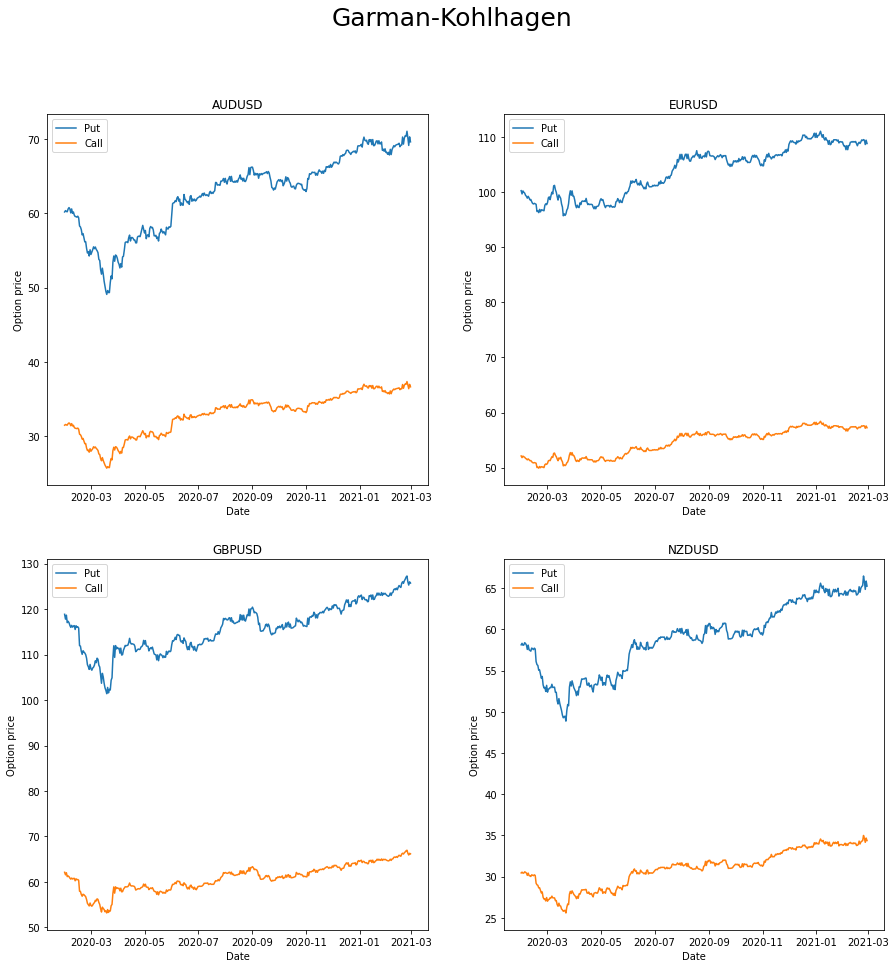

In [20]:
date_option_AUDUSD_g, price_option_AUDUSD_g = zip(* dict_put_AUDUSD1440_g.items())
date_option_EURUSD_g, price_option_EURUSD_g = zip(* dict_put_EURUSD1440_g.items()) 
date_option_GBPUSD_g, price_option_GBPUSD_g = zip(* dict_put_GBPUSD1440_g.items()) 
date_option_NZDUSD_g, price_option_NZDUSD_g = zip(* dict_put_NZDUSD1440_g.items()) 

fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Garman-Kohlhagen', fontsize=25) 
# modification from Black-Scholes option pricing model
axs[0, 0].plot(date_option_AUDUSD_g, list_put_AUDUSD1440_g, label = 'Put')
axs[0, 0].plot(date_option_AUDUSD_g, list_call_AUDUSD1440_g, label = 'Call')
axs[0, 0].set_title('AUDUSD')
axs[0, 1].plot(date_option_EURUSD_g, list_put_EURUSD1440_g,  label = 'Put')
axs[0, 1].plot(date_option_EURUSD_g, list_call_EURUSD1440_g,  label = 'Call')
axs[0, 1].set_title('EURUSD')
axs[1, 0].plot(date_option_GBPUSD_g, list_put_GBPUSD1440_g, label = 'Put')
axs[1, 0].plot(date_option_GBPUSD_g, list_call_GBPUSD1440_g, label = 'Call')
axs[1, 0].set_title('GBPUSD')
axs[1, 1].plot(date_option_NZDUSD_g, list_put_NZDUSD1440_g,  label = 'Put')
axs[1, 1].plot(date_option_NZDUSD_g, list_call_NZDUSD1440_g, label = 'Call')
axs[1, 1].set_title('NZDUSD')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Option price')
    ax.legend()

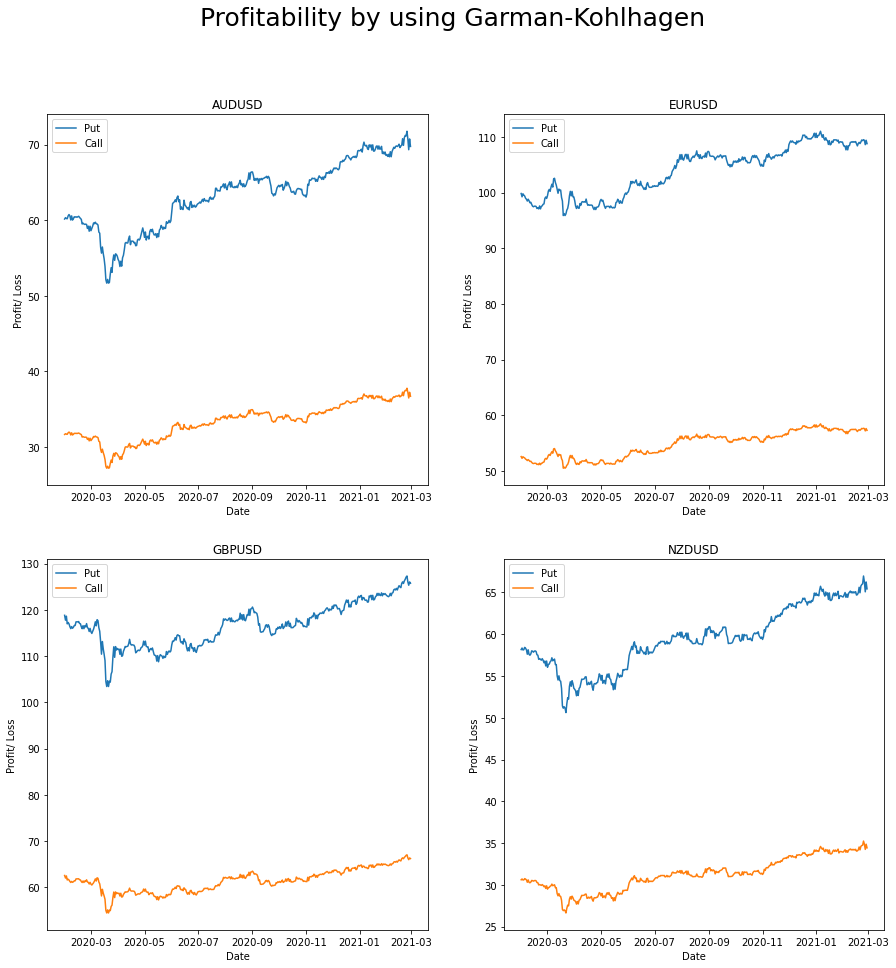

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Profitability by using Garman-Kohlhagen', fontsize=25)
axs[0, 0].plot(date_option_AUDUSD_g, profit_put_AUDUSD_g, label = 'Put')
axs[0, 0].plot(date_option_AUDUSD_g, profit_call_AUDUSD_g, label = 'Call')
axs[0, 0].set_title('AUDUSD')
axs[0, 1].plot(date_option_EURUSD_g, profit_put_EURUSD_g,  label = 'Put')
axs[0, 1].plot(date_option_EURUSD_g, profit_call_EURUSD_g,  label = 'Call')
axs[0, 1].set_title('EURUSD')
axs[1, 0].plot(date_option_GBPUSD_g, profit_put_GBPUSD_g, label = 'Put')
axs[1, 0].plot(date_option_GBPUSD_g, profit_call_GBPUSD_g, label = 'Call')
axs[1, 0].set_title('GBPUSD')
axs[1, 1].plot(date_option_NZDUSD_g, profit_put_NZDUSD_g,  label = 'Put')
axs[1, 1].plot(date_option_NZDUSD_g, profit_call_NZDUSD_g, label = 'Call')
axs[1, 1].set_title('NZDUSD')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Profit/ Loss')
    ax.legend()

In [22]:
exchange_rate_pair_put = [profit_put_AUDUSD_g, profit_put_EURUSD_g, profit_put_GBPUSD_g, profit_put_NZDUSD_g]
exchange_rate_pair_call = [profit_call_AUDUSD_g, profit_call_EURUSD_g, profit_call_GBPUSD_g, profit_call_NZDUSD_g]
for i, label in enumerate(labels):
    res_put = profitability_std(exchange_rate_pair_put[i])
    res_call = profitability_std(exchange_rate_pair_call[i])
    print(f'{labels[i]}: std of call = {res_call} and std of put = {res_put}')

AUDUSD: std of call = 2.3420362445485208 and std of put = 4.449868864642189
EURUSD: std of call = 2.3075837987471166 and std of put = 4.38440921761952
GBPUSD: std of call = 2.4264171693280416 and std of put = 4.610192621723278
NZDUSD: std of call = 1.9375203522594209 and std of put = 3.6812886692928966


### Visualization

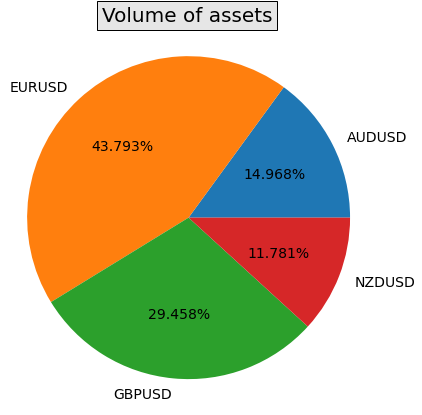

In [23]:
all_pair = ["AUDUSD1440", "EURUSD1440", "GBPUSD1440", "NZDUSD1440"]
def avg_volume(data, first_date, last_date):
    # such as first_date = date(2020, 1, 1) and last_date = date(2021, 3, 1)
    start_date = first_date.isoformat()+str(' 00:00')
    end_date = last_date.isoformat()+str(' 00:00')
    mask = (open_file(data)['date'] >= start_date) & (open_file(data)['date'] <= end_date)
    volume = open_file(data).loc[mask]['vol'].astype(float)
    return mean(volume.values)

d = {}
for i, p in enumerate(all_pair):
    first_date, last_date = date(2020, 1, 1), date(2021, 3, 1)
    d["vol_{0}".format(p)] = avg_volume(all_pair[i], first_date, last_date)

vols = []
fig = plt.figure(figsize=(6,6))
for x, y in d.items():
    vols.append(y)
plt.pie(vols, labels=labels,autopct='%1.3f%%', radius = 2, textprops={'fontsize': 14})
plt.title("Volume of assets", bbox={'facecolor':'0.9', 'pad':5}, fontsize = 20)
plt.axis('equal')
plt.tight_layout()
plt.show()



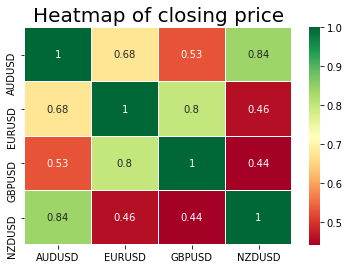

In [24]:
import seaborn as sns
d1 = open_file("AUDUSD1440")['close'].rename('AUDUSD')
d2 = open_file("EURUSD1440")['close'].rename('EURUSD')
d3 = open_file("GBPUSD1440")['close'].rename('GBPUSD')
d4 = open_file("NZDUSD1440")['close'].rename('NZDUSD')
multi_pair = pd.concat([d1, d2, d3, d4],names = ["AUDUSD", "EURUSD", "GBPUSD", "NZDUSD"], axis=1)

ax = sns.heatmap(multi_pair.corr(), cmap='RdYlGn', linewidths=.1,annot=True)
plt.title("Heatmap of closing price", fontsize = 20)
plt.show()

